<a href="https://colab.research.google.com/github/Dehan001/data_science/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pet Breed Recognizer

I am working with different types of pets, focusing on six of the most common pets, including dogs, cats, rabbits, hamsters, and fish. The goal of this project is to classify 30 different types of pets common around the world. The types are as follows:

### Dogs:
1. Labrador Retriever
2. German Shepherd
3. Bulldog
4. Poodle
5. Golden Retriever

### Cats:
6. Persian Cat
7. Siamese Cat
8. Maine Coon
9. Bengal Cat
10. Sphynx Cat

### Rabbits:
11. Holland Lop
12. Mini Rex
13. Netherland Dwarf
14. Lionhead Rabbit
15. Flemish Giant

### Hamsters:
16. Syrian Hamster
17. Campbell's Dwarf Hamster
18. Roborovski Hamster
19. Winter White Dwarf Hamster
20. Chinese Hamster

### Fish:
21. Betta Fish
22. Goldfish
23. Guppy
24. Angelfish
25. Neon Tetra

### Birds:
26. Parakeet (Budgie)
27. Cockatiel
28. African Grey Parrot
29. Lovebird
30. Canary



# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
batch_size = 8

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Pet Breed Recognizer

/content/drive/MyDrive/Pet Breed Recognizer


# Download Images from Browser

In [6]:
doc(search_images_ddg)

In [7]:
pet_breeds = [
    "labrador retriever dog",
    "german shepherd dog",
    "bulldog dog",
    "poodle dog",
    "golden retriever dog",
    "persian cat",
    "siamese cat",
    "maine coon cat",
    "bengal cat",
    "sphynx cat",
    "holland lop rabbit",
    "mini rex rabbit",
    "netherland dwarf rabbit",
    "lionhead rabbit",
    "flemish giant rabbit",
    "syrian hamster",
    "campbell's dwarf hamster",
    "roborovski hamster",
    "winter white dwarf hamster",
    "chinese hamster",
    "betta fish",
    "goldfish",
    "guppy fish",
    "angelfish",
    "neon tetra fish",
    "parakeet bird",
    "cockatiel bird",
    "african grey parrot bird",
    "lovebird",
    "canary bird"
]


len(pet_breeds)

30

In [8]:
images = search_images_ddg(pet_breeds[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://4.bp.blogspot.com/-zzX53cZXdVI/UHeR4WrzM1I/AAAAAAAAAvA/XA32_UtnWcY/s1600/White-Labrador-Retriever-Puppy.jpg'

In [9]:
doc(download_url)

In [10]:
dest = "german shepherd dog.jpg"
download_url(images[0], dest, show_progress=False)

Path('german shepherd dog.jpg')

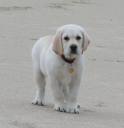

In [11]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [12]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for pet_breed in pet_breeds:

  dest = f"{data_path}/{pet_breed}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(pet_breed)
    download_images(dest, urls = cap_image_urls)

  except:
    continue

In [13]:
image_counts = get_image_files(data_path)
image_counts

(#5578) [Path('data/labrador retriever dog/1456c09f-fec1-42f7-b46f-c822fcc753ca.jpg'),Path('data/labrador retriever dog/74554c25-0702-42a8-a255-7751ceef38a0.jpg'),Path('data/labrador retriever dog/7016bbec-6dc6-4ec4-93a6-ea1a82b96987.jpg'),Path('data/labrador retriever dog/e883d0ef-1d10-4e7a-928a-664fd2b0e856.jpg'),Path('data/labrador retriever dog/57e5780a-982f-4b92-8c52-d2a8df076453.jpg'),Path('data/labrador retriever dog/5bff3a07-ccdb-4e56-b6f9-f875e079f0ff.jpg'),Path('data/labrador retriever dog/060e0368-d587-4016-82d3-6f861e17798a.jpg'),Path('data/labrador retriever dog/af613459-8b53-4672-b5f0-83c0a2272d2e.png'),Path('data/labrador retriever dog/3c3a4cea-0b97-4905-a2f1-bdc4e8c463a6.jpg'),Path('data/labrador retriever dog/d0dcf427-e808-4b8a-9423-bc2fe902765b.jpg')...]

In [14]:
failed = verify_images(image_counts)
failed

(#141) [Path('data/labrador retriever dog/b9346a1e-f90b-409e-ab17-218397ab280d.jpg'),Path('data/labrador retriever dog/2d0b8750-cd83-44af-a116-9fb5c7ad0e32.jpg'),Path('data/german shepherd dog/3a408f1e-f9e6-492b-bfb6-69f3de9deda2.jpg'),Path('data/german shepherd dog/a1c7b658-0492-4e0b-987c-f09ca27a4f86.jpg'),Path('data/german shepherd dog/d18b26af-a337-4e8b-b1c5-698a171bb4b3.jpg'),Path('data/german shepherd dog/51a4f1ed-3dc4-4a1a-8615-6afce07f2375.jpg'),Path('data/german shepherd dog/1c0cb824-8df2-4ca7-a229-e7a046e2a849.jpg'),Path('data/german shepherd dog/a98aa824-f223-4c49-aa42-cd69e74649d0.jpeg'),Path('data/german shepherd dog/43c3f4ba-042c-4242-82d6-e1cd90f8558d.jpg'),Path('data/german shepherd dog/94ec4455-fde8-4f79-92a5-eefabaa05298.jpg')...]

In [15]:
failed.map(Path.unlink)

(#141) [None,None,None,None,None,None,None,None,None,None...]